In [2]:
#Database muy pesado, se importa en una cantidad limitada.

import pandas as pd

reader = pd.read_csv('final_animedataset.csv',chunksize=10000)

#for batch in df:

   # print(batch.head(5))

In [3]:
# Obtener el primer chunk de datos y sus columnas
df = next(reader)
columnas = df.columns


# Imprimir las variables (columnas)
for columna in columnas:
    print(columna)

username
anime_id
my_score
user_id
gender
title
type
source
score
scored_by
rank
popularity
genre


In [4]:
#Muestreo probabilístico
#1) Por CLUSTERS

from sklearn.utils import resample

In [5]:
# Crear la variable X con todas las columnas excepto 'username'
X = df.drop('username', axis=1)

# Crear la variable Y con solo la columna 'username'
y = df['username']

In [6]:
X_resampled, y_resampled = resample(X, y,
                                    replace=True,  # Permitir reemplazo en el remuestreo
                                    n_samples=1000,  # Tamaño de la nueva muestra
                                    random_state=42,  # Semilla aleatoria para reproducibilidad
                                    stratify=y)  # Remuestreo estratificado según las etiquetas


In [7]:
X_resampled, y_resampled = resample(X, y)

In [9]:
df_resampled = resample(df, replace=True, n_samples=1000, random_state=42)

<AxesSubplot:ylabel='Frequency'>

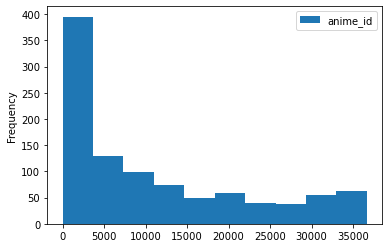

In [10]:
df_resampled.plot(kind='hist', y='anime_id')

In [12]:
#Muestreo No Probabilistico
#2)Sistematico


import numpy as np

# Crear un arreglo de valores en un rango especificado
inicio = 15000
fin = 80000
paso = 3
arreglo = np.arange(inicio, fin, paso)

arreglo = np.arange(len(df['anime_id']))
print(arreglo)


[   0    1    2 ... 9997 9998 9999]


In [15]:
#Muestreo No Probabilistico
#3) Con PROPOSITO


df_resampled_2 = df[df["popularity"] < 2000]



In [17]:

#Muestreo No Probabilistico
#4) Con CUOTA

import random
cuotas = {
    'gender': {'Female': 60, 'Male': 40},
    'type': {'TV': 50, 'Movie': 30, 'OVA': 20},
    # Agrega las cuotas para las otras variables...
}


muestra_cuotas = []

# Función para verificar si se han cumplido las cuotas para todas las variables
def cumplir_cuotas(muestra_cuotas, cuotas):
    for variable, categorias in cuotas.items():
        for categoria, cuota in categorias.items():
            if sum(1 for row in muestra_cuotas if row[variable] == categoria) >= cuota:
                return True
    return False


contador_datos = 0

# Realizar el muestreo por cuota hasta alcanzar al menos 1000 datos
while contador_datos < 1000:
    for _, row in df.iterrows():
        participante = {
            'username': row['username'],
            'anime_id': row['anime_id'],
            'my_score': row['my_score'],
            'user_id': row['user_id'],
            'gender': row['gender'],
            'title': row['title'],
            'type': row['type'],
            'source': row['source'],
            'score': row['score'],
            'scored_by': row['scored_by'],
            'rank': row['rank'],
            'popularity': row['popularity']
        }
        muestra_cuotas.append(participante)
        contador_datos += 1
        
        if cumplir_cuotas(muestra_cuotas, cuotas) and contador_datos >= 1000:
            break


df_muestra_cuotas = pd.DataFrame(muestra_cuotas)

In [18]:
df.shape[0]

10000

In [22]:
df["popularity"].mean()

2026.5418

In [34]:
df["popularity"].std() 

1987.9870460096772

In [19]:
#Muestreo No Probabilistico
df_muestra_cuotas.shape[0]

1000

In [23]:
#Muestreo No Probabilistico
df_muestra_cuotas["popularity"].mean()

1007.261

In [30]:
#Muestreo No Probabilistico
df_muestra_cuotas["popularity"].std()

1206.8155785867696

In [20]:
#Muestreo Probabilístico
df_resampled.shape[0]

1000

In [31]:
#Muestreo Probabilístico
df_resampled["popularity"].mean()

2012.585

In [33]:
#Muestreo Probabilístico
df_resampled["popularity"].std()

1984.5612164901825